In [1]:
import numpy as np
np.random.seed(43)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import progressbar
import pickle

from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
from keras.utils.np_utils import to_categorical
from keras.utils.visualize_util import plot

Using TensorFlow backend.


## Load the data

In [2]:
# Load the data
X_train = np.load('./X_train.npy')
X_test = np.load('./X_test.npy')
y_train = np.load('./y_train.npy')

## Define the model and Train

In [3]:
# Shuffle the training data before training
shuffle_i = np.arange(len(X_train))
np.random.shuffle(shuffle_i)
X_train = X_train[shuffle_i]
y_train = y_train[shuffle_i]

# Define the model
model = Sequential()
model.add(Convolution2D(6,5,5, border_mode='same', input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(16,5,5, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# Flatten
model.add(Flatten())
# Fully Connected Layer
model.add(Dropout(0.15))
model.add(Dense(output_dim=120, activation='relu'))
model.add(Dense(output_dim=80, activation='relu'))
model.add(Dense(output_dim=10, activation='softmax'))

# Define the optimizer and the loss function
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
y_train = to_categorical(y_train)
hist = model_hist = model.fit(X_train, y_train, batch_size=128, nb_epoch=17, validation_split=0.15)

Train on 35700 samples, validate on 6300 samples
Epoch 1/17
35700/35700 [==============================] - 16s - loss: 0.3941 - acc: 0.8836 - val_loss: 0.1242 - val_acc: 0.9622
Epoch 2/17
35700/35700 [==============================] - 16s - loss: 0.1111 - acc: 0.9653 - val_loss: 0.0810 - val_acc: 0.9775
Epoch 3/17
35700/35700 [==============================] - 16s - loss: 0.0797 - acc: 0.9749 - val_loss: 0.0751 - val_acc: 0.9795
Epoch 4/17
35700/35700 [==============================] - 16s - loss: 0.0631 - acc: 0.9799 - val_loss: 0.0617 - val_acc: 0.9817
Epoch 5/17
35700/35700 [==============================] - 15s - loss: 0.0530 - acc: 0.9829 - val_loss: 0.0589 - val_acc: 0.9833
Epoch 6/17
35700/35700 [==============================] - 15s - loss: 0.0425 - acc: 0.9864 - val_loss: 0.0508 - val_acc: 0.9862
Epoch 7/17
35700/35700 [==============================] - 16s - loss: 0.0377 - acc: 0.9874 - val_loss: 0.0471 - val_acc: 0.9849
Epoch 8/17
35700/35700 [==============================]

## Analyze the training result

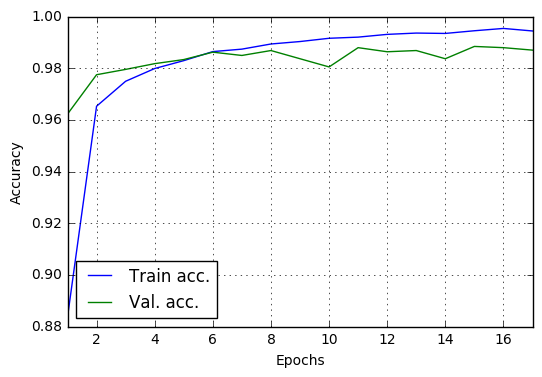

In [4]:
hist_data = hist.history
fig = plt.figure()
plt.plot(np.array(hist.epoch)+1, hist_data['acc']);
plt.plot(np.array(hist.epoch)+1,hist_data['val_acc']);
plt.legend(['Train acc.', 'Val. acc.'], loc='best')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.grid('on')
lim = plt.xlim([1, len(hist.epoch)])

## Predict the test data and create submission file

In [5]:
y_predicted = model.predict(X_test)

In [6]:
# Convert it into one-dimensional array by choosing the max of each row
y_pred = []
for row in y_predicted:
    y_pred.append(np.argmax(row))
y_pred = np.array(y_pred)

In [7]:
# Load the example submission and replace the column with predictions
sub_file = pd.read_csv('./sample_submission.csv')
sub_file['Label'] = y_pred
sub_file.to_csv('./sub2.csv', index=False)